In [88]:
%load_ext autoreload
%autoreload 1
%aimport game

import game
import time
import random

game._build_row_tables()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
def naive_minimize_empty_tiles(bs, action_space):
    best_action, best_score = None, 0
    for action in action_space:
        new_bs = action(bs)
        num_empty_tiles = len(game.get_empty_tiles(new_bs))
        if num_empty_tiles > best_score:
            best_action, best_score = action, num_empty_tiles
    return best_action(bs)


In [100]:
start_board = [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
]
bs = game.to_bitset(start_board)

for i in range(100000):
    bs = game.generate_tile(bs)
    action_space = game.get_action_space(bs)
    game.print_board(game.to_board(bs), f"Turn {i}: Random tile")
    if action_space:
        bs = naive_minimize_empty_tiles(bs, action_space)
    else:
        break
    game.print_board(game.to_board(bs), f"Turn {i}: Taken action")
        

Turn 0: Random tile
 .  .  .  .
 .  .  .  .
 .  2  .  .
 .  .  .  .
Turn 0: Taken action
 .  .  .  .
 .  .  .  .
 2  .  .  .
 .  .  .  .
Turn 1: Random tile
 .  .  .  .
 .  .  .  2
 2  .  .  .
 .  .  .  .
Turn 1: Taken action
 .  .  .  .
 2  .  .  .
 2  .  .  .
 .  .  .  .
Turn 2: Random tile
 .  .  .  .
 2  .  .  .
 2  .  .  .
 .  .  2  .
Turn 2: Taken action
 4  .  2  .
 .  .  .  .
 .  .  .  .
 .  .  .  .
Turn 3: Random tile
 4  .  2  .
 .  2  .  .
 .  .  .  .
 .  .  .  .
Turn 3: Taken action
 4  2  .  .
 2  .  .  .
 .  .  .  .
 .  .  .  .
Turn 4: Random tile
 4  2  .  .
 2  .  2  .
 .  .  .  .
 .  .  .  .
Turn 4: Taken action
 4  2  .  .
 2  2  .  .
 .  .  .  .
 .  .  .  .
Turn 5: Random tile
 4  2  .  2
 2  2  .  .
 .  .  .  .
 .  .  .  .
Turn 5: Taken action
 4  2  2  .
 4  .  .  .
 .  .  .  .
 .  .  .  .
Turn 6: Random tile
 4  2  2  .
 4  .  .  .
 2  .  .  .
 .  .  .  .
Turn 6: Taken action
 4  4  .  .
 4  .  .  .
 2  .  .  .
 .  .  .  .
Turn 7: Random tile
 4  4  .  .
 4  .  . 

In [91]:
max_iters = 1000000
num_games = 1000

game_results = []

for game_index in range(num_games):
    start_board = [
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
    ]
    bs = game.to_bitset(start_board)

    start_iter = time.time()

    for i in range(max_iters):
        bs = game.generate_tile(bs)
        action_space = game.get_action_space(bs)
        if action_space:
            bs = minimize_empty_tiles(bs, action_space)
        else:
            break
        
    time_taken = time.time() - start_iter
    game_results.append({
        'num_turns_taken': i,
        'max_tile_reached': game.get_max_tile(bs),
        'time_taken': time_taken,
    })


In [94]:
print(f'Number of games played: {num_games}')
print(f'Total time taken: {sum(result["time_taken"] for result in game_results)} seconds')
print(f'Games per second: {num_games / sum(result["time_taken"] for result in game_results)}')

print()
print(f'Max number of turns before game over: {max(result["num_turns_taken"] for result in game_results)}')
print(f'Min number of turns before game over: {min(result["num_turns_taken"] for result in game_results)}')
print(f'Average number of turns before game over: {sum(result["num_turns_taken"] for result in game_results) / len(game_results)}')

print()
print(f'Max tile reached: {max(result["max_tile_reached"] for result in game_results)}')
print(f'Min tile reached: {min(result["max_tile_reached"] for result in game_results)}')
print(f'Average max tile reached: {sum(result["max_tile_reached"] for result in game_results) / len(game_results)}')



Number of games played: 1000
Total time taken: 11.77928614616394 seconds
Games per second: 84.89478798557428

Max number of turns before game over: 763
Min number of turns before game over: 58
Average number of turns before game over: 251.694

Max tile reached: 1024
Min tile reached: 32
Average max tile reached: 229.216


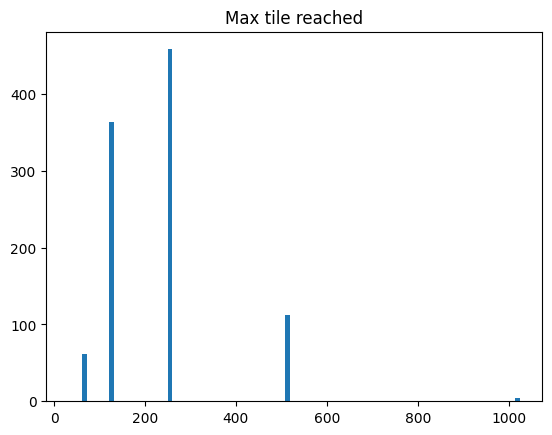

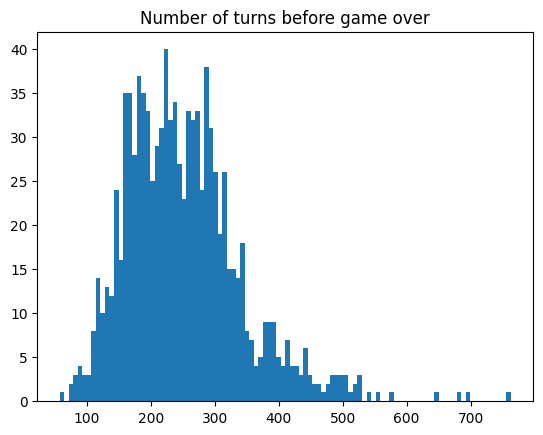

In [93]:
import pandas as pd
df = pd.DataFrame(game_results)

import matplotlib.pyplot as plt
plt.hist(df['max_tile_reached'], bins=100)
plt.title('Max tile reached')
plt.show()

plt.hist(df['num_turns_taken'], bins=100)
plt.title('Number of turns before game over')
plt.show()